전처리


In [155]:
#한글 깨지는 것 방지

# 한글 폰트 설정 (윈도우 기준: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 음수 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [156]:
# 데이터 처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계
import scipy.stats as stats

# 머신러닝 (전처리, 모델링, 평가)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report


In [157]:
#파일 가져오기
df = pd.read_csv('2025_Airbnb_NYC_listings.csv')  # 업로드한 파일명 그대로 입력
df.head(5)

#호스트 관련 컬럼
host_related_columns = [
    'host_id',
    'host_name',
    'host_since',
    'host_location',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'host_is_superhost',
    'host_listings_count',
    'host_identity_verified'
    ]

host_df = df[host_related_columns]
host_df


#위치 관련 place_df
place_df = df.copy()
place_related_columns = [
    'neighbourhood',
    'neighbourhood_group_cleansed',
    'latitude',
    'longitude'
    ]
place_df = df[place_related_columns]
place_df

#숙소 정보 관련 info_df
information_related_columns = [
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bathrooms',
    'amenities']
info_df = df[information_related_columns]
info_df.head(2)

#가격 및 예약 관련 컬럼 price_df
price_related_columns = [
    'price',
    'minimum_nights',
    'maximum_nights',
    'availability_365',
    'instant_bookable'

]
price_df = df[price_related_columns]
price_df.head(2)

#리뷰 및 평점 관련 review_df
review_related_columns = [
    'number_of_reviews',
    'reviews_per_month',
    'review_scores_rating',
    'review_scores_cleanliness',
    'review_scores_communication',
    'first_review',
    'last_review'
]

review_df = df[review_related_columns]
review_df.head(2)

,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,first_review,last_review
0,9,0.05,4.88,4.80,5.0,2010-12-11,2013-05-10
1,102,0.58,4.77,4.76,4.9,2010-10-04,2023-12-09


In [158]:
df = pd.concat([host_df, place_df, info_df, price_df, review_df], axis=1)


In [159]:
df
df_backup = df.copy()

In [160]:
df[['room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities']].isnull().sum()

room_type        0
accommodates     0
bedrooms        49
beds            79
bathrooms        6
amenities        0
dtype: int64

In [161]:
df[['room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities']].isnull().mean()

room_type       0.000000
accommodates    0.000000
bedrooms        0.002197
beds            0.003541
bathrooms       0.000269
amenities       0.000000
dtype: float64

In [162]:
dummies = pd.get_dummies(df['room_type'], prefix='room_type', drop_first=True)
df = pd.concat([df, dummies], axis=1)

이상치 확인

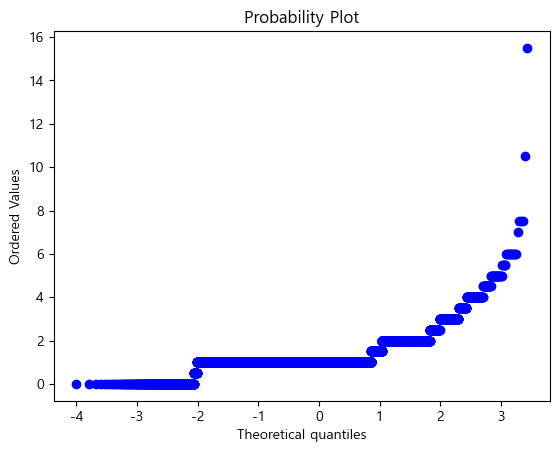

In [163]:
##QQplot 데이터가 대각선에 가까우면 정규분포에 가까움. 
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['bathrooms'], dist="norm", plot=plt)
plt.show()

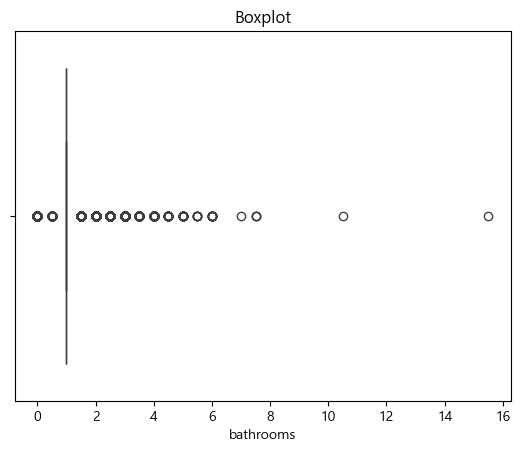

In [164]:
#박스플롯 그려보기
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['bathrooms'])
plt.title('Boxplot')
plt.show()

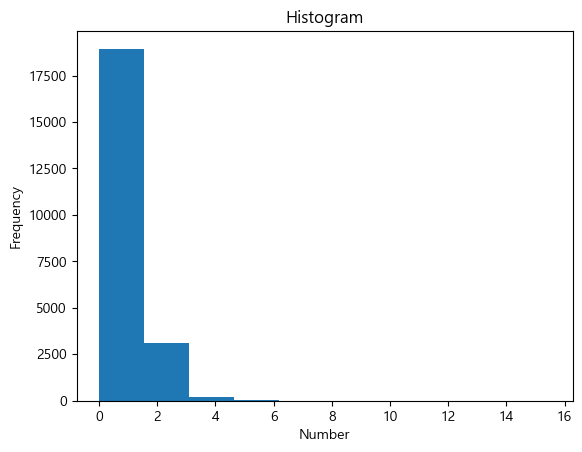

In [165]:
plt.hist(df['bathrooms'])
plt.title('Histogram')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

In [166]:
#Z스코어통해 이상치 확인
from scipy import stats
z_scores = np.abs(stats.zscore(df['bathrooms']))

outlier_mask = z_scores > 3

num_outliers = outlier_mask.sum()

total = len(df)

ratio = num_outliers / total * 100

print(f"이상치 개수: {num_outliers}")
print(f"전체 대비 비율 : {ratio:.2f}%")



이상치 개수: 0
전체 대비 비율 : 0.00%


In [167]:
#iqr 기준으로 이상치 탐지
target = 'bathrooms'
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 + 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"{target} 이상치 기준 하한선: {lower_bound}")
print(f"{target} 이상치 기준 상한선: {upper_bound}")

bathrooms 이상치 기준 하한선: 1.0
bathrooms 이상치 기준 상한선: 1.0


In [168]:
# 이상치 데이터만 따로 df_outliers로 만들기
df_outliers = df[outlier_mask]

In [169]:
# 이상치 행 구체적으로 확인
df_outliers[['accommodates', 'bedrooms', 'beds', 'property_type', 'room_type', 'price']]

,accommodates,bedrooms,beds,property_type,room_type,price


In [170]:
df[['bedrooms', 'beds', 'bathrooms']].describe()

,bedrooms,beds,bathrooms
count,22259.000000,22229.000000,22302.000000
mean,1.315468,1.646318,1.192897
std,0.918378,1.200619,0.556670
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,1.000000
max,15.000000,42.000000,15.500000


In [171]:
df[df['bathrooms'] == 15]

,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,...,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,first_review,last_review,room_type_Hotel room,room_type_Private room,room_type_Shared room


In [172]:
df[(df['bathrooms'] >= 10) & (df['bathrooms'] <= 14)]

,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,...,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,first_review,last_review,room_type_Hotel room,room_type_Private room,room_type_Shared room
1235,9147223,"Pucci,Amanda",2013-09-30,"New York, NY",within an hour,100%,100%,f,1.0,t,...,21,0.18,4.86,4.95,5.0,2015-09-29,2024-08-25,False,True,False


<function matplotlib.pyplot.show(close=None, block=None)>

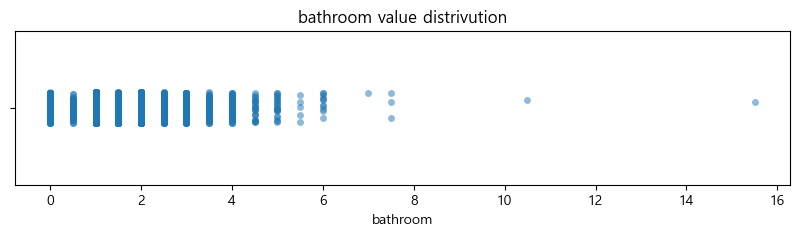

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.stripplot(x=df['bathrooms'], alpha=0.5, jitter=True) #jitter=True로 겹침 방지
plt.xlabel('bathroom')
plt.title('bathroom value distrivution')
plt.show

In [181]:
#이상치 제거
index_to_drop = df[df['bathrooms'] == 10.5].index
df.drop(index=index_to_drop, inplace=True)


#전처리 전/후 데이터 개수
print(f"전처리 전 데이터 개수: {df_backup.shape}")
print(f"전처리 후 데이터 개수: {df.shape}")
print("\n 결과해석 \n (행1개 삭제) 비상식적으로 bathrooms이 많았던 행 1개 제거 \n (열3개 추가) room_type 더미변수 3개 추가")

전처리 전 데이터 개수: (22308, 33)
전처리 후 데이터 개수: (22307, 36)

 결과해석 
 (행1개 삭제) 비상식적으로 bathrooms이 많았던 행 1개 제거 
 (열3개 추가) room_type 더미변수 3개 추가


amenities 리스트 요소를 카운팅한 새로운 파생컬럼 만들기

In [150]:
#4번째 행의 amenities를 볼 수 있음
print(df['amenities'].iloc[0])

["Refrigerator", "Dishes and silverware", "Wifi", "Kitchen", "Elevator", "City skyline view", "Heating"]


In [186]:
#ast.literal_eval() 문자열로 된 리시트, 딕셔너리, 숫자, 튜플 등을 실제 파이썬 객체로 안전하게 변환하고 싶을 때 사용
#ast : abstract syntax tree 모듈 -> 파이썬 코드 자체를 문법구조로 분석하는 내장 모듈
#literal_eval : 문자 그대로 평가하는 뜻
#문법을 보고 문자 그대로 평가해서 객체로 바꿔
#apply 각 행에 대해 람다 함수를 적용해
import ast

df['amenities_count'] = df['amenities'].apply(lambda x : len(ast.literal_eval(x))) 
df.head(3)

,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,...,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,first_review,last_review,room_type_Hotel room,room_type_Private room,room_type_Shared room,amenities_count
0,62165,Michael,2009-12-11,"New York, NY",NaN,NaN,NaN,f,1.0,t,...,0.05,4.88,4.80,5.00,2010-12-11,2013-05-10,False,True,False,7
1,157798,Irene,2010-07-04,"New York, NY",NaN,NaN,100%,f,1.0,t,...,0.58,4.77,4.76,4.90,2010-10-04,2023-12-09,False,True,False,32
2,165789,Sarah,2010-07-13,"New York, NY",within a few hours,100%,40%,f,1.0,t,...,0.28,4.70,4.52,4.88,2012-07-09,2023-08-30,False,True,False,68


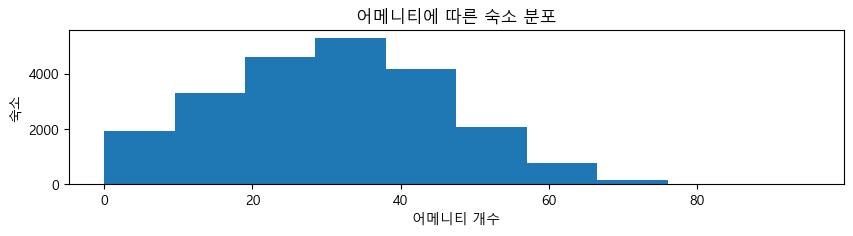

In [207]:
plt.figure(figsize=(10, 2))
plt.hist(df['amenities_count'], bins=10)
plt.xlabel('어메니티 개수')
plt.ylabel('숙소')
plt.title('어메니티에 따른 숙소 분포')
plt.show()

<Axes: xlabel='amenities_count', ylabel='price'>

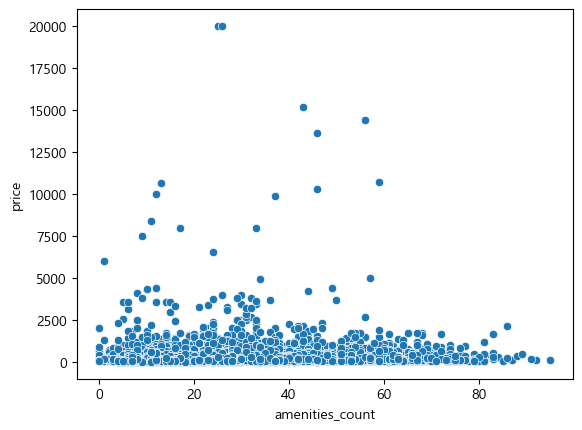

In [211]:
sns.scatterplot(x='amenities_count', y='price', data=df)


In [210]:
df['pirce'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7332\3925776730.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['pirce'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


숙소유형과 가격의 관계 
상관계수로 알아보기

- 수치형 변수 : accommodates, bedrooms, bathrooms, beds, amenites_count
- 범주형 변수 : room_type
- 타겟 변수 : price 

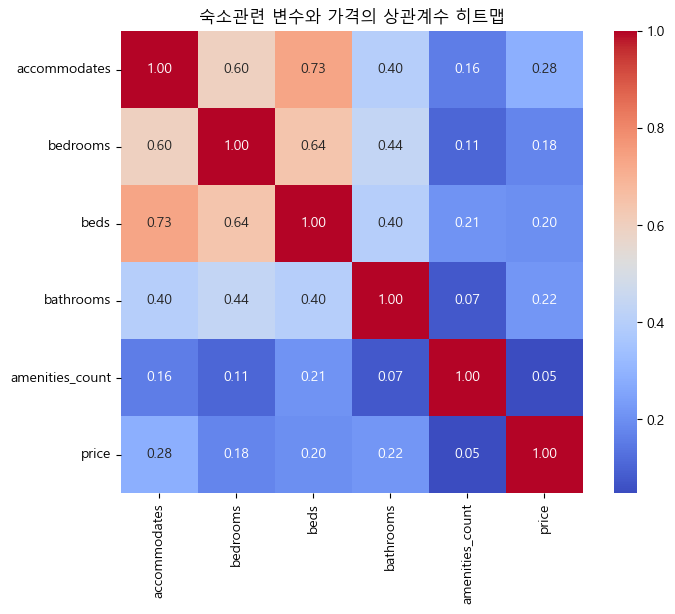

In [219]:
#어메니티와 가격의 상관관계 게수 
numerical_var = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities_count', 'price']
corr = df[numerical_var].corr()

#히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True )
plt.title("숙소관련 변수와 가격의 상관계수 히트맵")
plt.show()